In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import cv2
import glob
import tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
image_list = []
code = []

for filename in glob.glob('L_MCA/*.tiff'):
    img = tiff.imread(filename)
    image_list.append(img)
    code.append(os.path.basename(filename).split('.tiff')[0])
    print(filename)
    

L_MCA\ADM001_Tmap_T15_L_MCA.tiff
L_MCA\ADM004_Tmap_T15_L_MCA.tiff
L_MCA\CTA002_Tmap_T15_L_MCA.tiff
L_MCA\CTA003_Tmap_T15_L_MCA.tiff
L_MCA\CTA004_Tmap_T15_L_MCA.tiff
L_MCA\ESP001_Tmap_T15_L_MCA.tiff
L_MCA\ESP002_Tmap_T15_L_MCA.tiff
L_MCA\ESP003_Tmap_T15_L_MCA.tiff
L_MCA\ESP006_Tmap_T15_L_MCA.tiff
L_MCA\ESP008_Tmap_T15_L_MCA.tiff
L_MCA\ESP009_Tmap_T15_L_MCA.tiff
L_MCA\ESP010_Tmap_T15_L_MCA.tiff
L_MCA\ESP011_Tmap_T15_L_MCA.tiff
L_MCA\EST004_Tmap_T15_L_MCA.tiff
L_MCA\EXT003_Tmap_T15_L_MCA.tiff
L_MCA\MED001_Tmap_T15_L_MCA.tiff
L_MCA\MED002_Tmap_T15_L_MCA.tiff
L_MCA\MED006_Tmap_T15_L_MCA.tiff
L_MCA\NRT001_Tmap_T15_L_MCA.tiff
L_MCA\NRT002_Tmap_T15_L_MCA.tiff
L_MCA\NRT003_Tmap_T15_L_MCA.tiff
L_MCA\NRT004_Tmap_T15_L_MCA.tiff


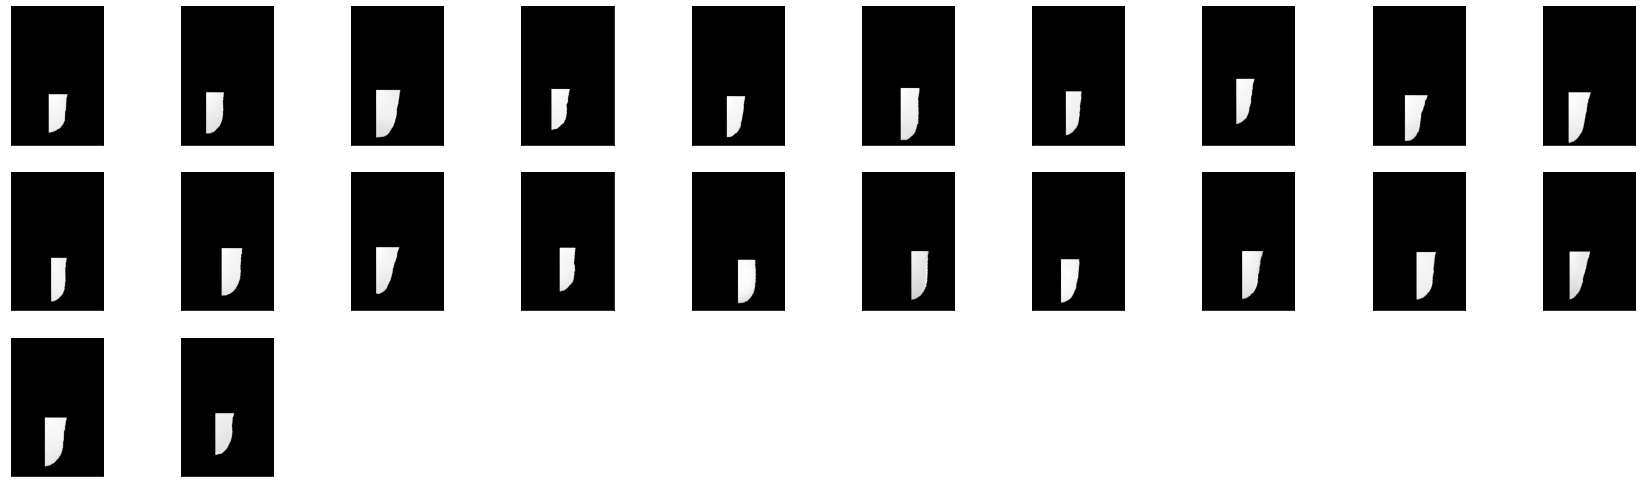

In [3]:
# Plot image for checking purposes
# Specify the overall grid size
plt.figure(figsize=(30,30)) 

for i in range(len(image_list)):
    # The number of images in the grid is 22 distributed in a 10 by 10 matrix
    plt.subplot(10,10,i+1)    
    plt.imshow(image_list[i], cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# Extract mean value for each angiosome on each image
# Define list in which data will be stored
L_MCA_mean = []
L_MCA_std = []
L_MCA_max = []
L_MCA_min = []
L_MCA_skew = []
L_MCA_kurtosis = []
L_MCA_img = []

subject = []

for i in range(len(image_list)):
    # Save image as array
    img = np.asarray(image_list[i][image_list[i] > 0])
    L_MCA_img.append(img)
    # Mean value
    img_mean = np.mean(image_list[i][image_list[i] > 0])   
    L_MCA_mean.append(img_mean)
    # Standard deviation 
    img_std = np.std(image_list[i][image_list[i] > 0])   
    L_MCA_std.append(img_std)
    # Maximum value
    img_max = np.max(image_list[i][image_list[i] > 0])   
    L_MCA_max.append(img_max)
    # Minimum value
    img_min = np.min(image_list[i][image_list[i] > 0])   
    L_MCA_min.append(img_min)
    # Skew
    img_skew = skew(image_list[i][image_list[i] > 0])   
    L_MCA_skew.append(img_skew)
    # Kurtosis
    img_kurtosis = kurtosis(image_list[i][image_list[i] > 0])   
    L_MCA_kurtosis.append(img_kurtosis)
    # Subject
    subject.append(code[i])
    print(subject[i], L_MCA_mean[i], L_MCA_std[i], L_MCA_max[i], L_MCA_min[i], L_MCA_skew[i], L_MCA_kurtosis[i])   


ADM001_Tmap_T15_L_MCA 26.02139 3.5376832 29.157473 0.023880996 -4.852582915725318 26.76522680408575
ADM004_Tmap_T15_L_MCA 19.129232 2.5624342 22.414062 0.10649239 -4.354156606525476 24.89311963041026
CTA002_Tmap_T15_L_MCA 23.162508 2.9575949 26.899065 0.13560343 -4.844860880329458 28.792712016521616
CTA003_Tmap_T15_L_MCA 22.32621 3.0674195 24.642042 0.11072725 -5.114593467315313 28.258777112761706
CTA004_Tmap_T15_L_MCA 21.091034 2.7686653 23.345705 0.5552788 -5.119943541543205 28.608301270197497
ESP001_Tmap_T15_L_MCA 24.115993 3.355931 27.734554 0.0758083 -4.334288366362814 23.40507112667237
ESP002_Tmap_T15_L_MCA 24.218317 3.3718066 27.908571 0.1533983 -5.034054871699896 26.99514823455015
ESP003_Tmap_T15_L_MCA 26.009937 3.8359835 29.279194 0.1252363 -4.542642928356907 23.022721698150736
ESP006_Tmap_T15_L_MCA 23.145996 3.2543664 26.223936 0.1252363 -4.406296161673663 23.295319666917756
ESP008_Tmap_T15_L_MCA 25.142046 3.5245028 28.236246 0.12384785 -4.686982949599284 25.091509188260474
E

In [5]:
# Initialize data of lists
data = {'Subject': subject,
        'L_MCA_mean': L_MCA_mean, 
        'L_MCA_std': L_MCA_std,
        'L_MCA_max': L_MCA_max,
        'L_MCA_min': L_MCA_min,
        'L_MCA_skew': L_MCA_skew,
        'L_MCA_kurtosis': L_MCA_kurtosis}
  
# Create DataFrame
df = pd.DataFrame(data)
display(df)

df.to_csv('L_MCA.csv', index=False) 

,Subject,L_MCA_mean,L_MCA_std,L_MCA_max,L_MCA_min,L_MCA_skew,L_MCA_kurtosis
0,ADM001_Tmap_T15_L_MCA,26.021391,3.537683,29.157473,0.023881,-4.852583,26.765227
1,ADM004_Tmap_T15_L_MCA,19.129232,2.562434,22.414062,0.106492,-4.354157,24.893120
2,CTA002_Tmap_T15_L_MCA,23.162508,2.957595,26.899065,0.135603,-4.844861,28.792712
3,CTA003_Tmap_T15_L_MCA,22.326210,3.067420,24.642042,0.110727,-5.114593,28.258777
4,CTA004_Tmap_T15_L_MCA,21.091034,2.768665,23.345705,0.555279,-5.119944,28.608301
5,ESP001_Tmap_T15_L_MCA,24.115993,3.355931,27.734554,0.075808,-4.334288,23.405071
6,ESP002_Tmap_T15_L_MCA,24.218317,3.371807,27.908571,0.153398,-5.034055,26.995148
7,ESP003_Tmap_T15_L_MCA,26.009937,3.835984,29.279194,0.125236,-4.542643,23.022722
8,ESP006_Tmap_T15_L_MCA,23.145996,3.254366,26.223936,0.125236,-4.406296,23.295320
9,ESP008_Tmap_T15_L_MCA,25.142046,3.524503,28.236246,0.123848,-4.686983,25.091509


In [6]:
# Total values for this angiosome
# Concatenate all data for extracting parameters
L_MCA_all = np.concatenate((L_MCA_img[0],L_MCA_img[1],L_MCA_img[2],L_MCA_img[3],L_MCA_img[4],L_MCA_img[5],
                            L_MCA_img[6],L_MCA_img[7],L_MCA_img[8],L_MCA_img[9],L_MCA_img[10],L_MCA_img[11],
                            L_MCA_img[12],L_MCA_img[13],L_MCA_img[14],L_MCA_img[15],L_MCA_img[16],L_MCA_img[17],
                            L_MCA_img[18],L_MCA_img[19],L_MCA_img[20],L_MCA_img[21]))
L_MCA_all_mean = np.mean(L_MCA_all)
L_MCA_all_std = np.std(L_MCA_all)
L_MCA_all_max = np.max(L_MCA_all)
L_MCA_all_min = np.min(L_MCA_all)
L_MCA_all_skew = skew(L_MCA_all)
L_MCA_all_kurtosis = kurtosis(L_MCA_all)


# Initialize data of lists
data2 = {'Variables':['L_MCA_all_mean', 'L_MCA_all_std', 'L_MCA_all_max', 'L_MCA_all_min', 'L_MCA_all_skew', 
                      'L_MCA_all_kurtosis'],
         'Values': [L_MCA_all_mean, L_MCA_all_std, L_MCA_all_max, L_MCA_all_min, L_MCA_all_skew, L_MCA_all_kurtosis]}
  
# Create DataFrame
df2 = pd.DataFrame(data2)
display(df2)

df2.to_csv('L_MCA_all.csv', index=False) 


,Variables,Values
0,L_MCA_all_mean,23.759350
1,L_MCA_all_std,3.873520
2,L_MCA_all_max,30.798607
3,L_MCA_all_min,0.019947
4,L_MCA_all_skew,-2.676696
5,L_MCA_all_kurtosis,11.797347


In [7]:
a_file = open("L_MCA.txt", "w")
np.savetxt(a_file, L_MCA_all)
a_file.close()